# Zillow Median 1 Bedroom Data Investigation

Data originally posted [here](https://www.kaggle.com/zillow/median-listing-price-1-bedroom)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('C:\\Users\\Thomas\\Workspace 2\\median_price.csv')
df.head()

In [3]:
## Noticed most regions lack consistent data up until August of 2015, retrieve this column location

print(df.columns.get_loc('2015-08'))

73


In [4]:
## Decided to look at Sept. 2015 to Sept. 2016
prices = df.columns[74:86]
df['yr_average'] = np.nanmean(df[prices], axis=1)
df['net_price_change_total'] = df['2016-09']-df['2010-01']
df['net_price_change_2yr'] = df['2016-09']-df['2014-09']
df['net_price_change_1yr'] = df['2016-09']-df['2015-09']
df['net_%_1yr'] = ((df['2016-09']-df['2015-09']) / df['2015-09'])*100
print(df[['City', 'yr_average','net_%_1yr','net_price_change_1yr']].nlargest(20, 'net_price_change_1yr'))
print("")
print("Data available for ", df['net_price_change_1yr'].count()," regions.")
avg_net_change_1yr = np.mean(df['net_price_change_1yr'])
avg_percent_1yr = np.mean(df['net_%_1yr'])
print("Average net change between 09/15 and 09/16: ", avg_net_change_1yr)
print("Average percent change between 09/15 and 09/16: ", avg_percent_1yr)

             City   yr_average  net_%_1yr  net_price_change_1yr
0        New York  1250.184414  20.689909            234.335631
4        New York   872.208131  26.355360            214.417850
43     Long Beach   413.257319  32.852899            116.549571
9        New York   364.681703  35.712080            114.953216
6        San Jose   564.643714  22.540294            113.226915
20       New York  1448.337583   4.993607             71.305951
50    Miami Beach   451.451486  16.883117             66.326531
7        New York   264.643680  20.512821             53.333333
18    Los Angeles   692.858376   7.474937             51.532687
22       New York  1789.697236   2.850151             50.774170
11          Miami   208.349138  27.780741             49.813743
45          Miami   404.554085  11.927732             42.913703
56    Miami Beach   245.202934  19.935497             42.882265
14         Dallas   233.134394  19.437149             41.788799
58  Pompano Beach   239.584673  17.64705

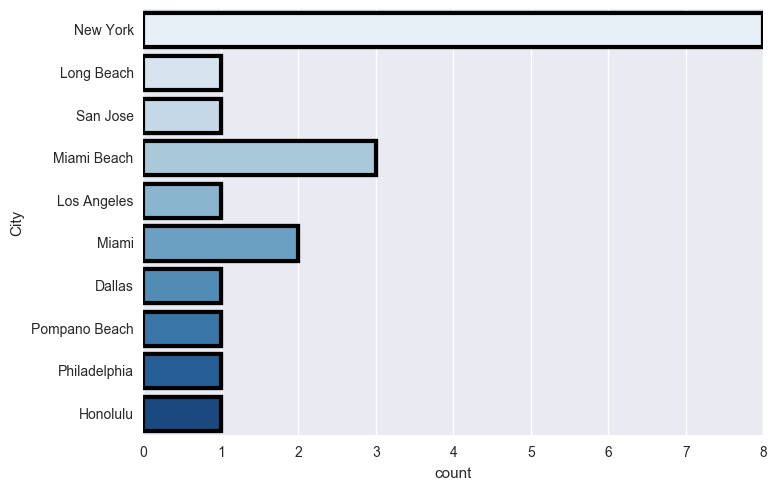

In [6]:
top_df = df[['City', 'yr_average','net_%_1yr','net_price_change_1yr']].nlargest(20, 'net_price_change_1yr')

r = sns.countplot(y='City', data=top_df, linewidth=3, palette='Blues')
plt.show()
plt.clf()

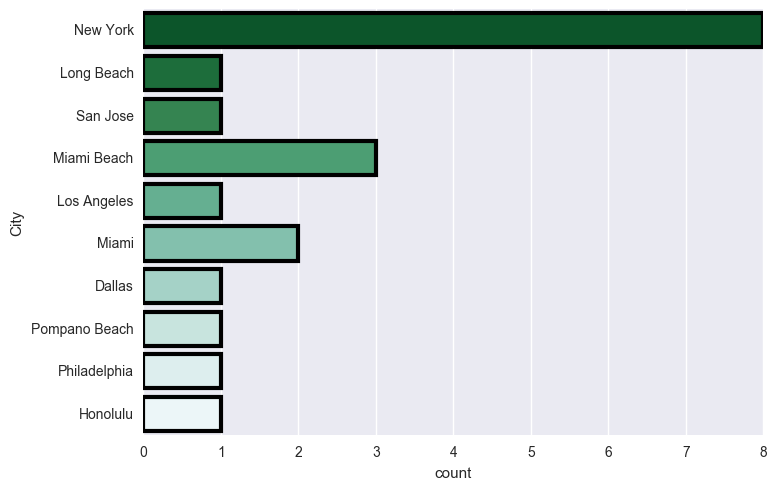

In [8]:
city_df = df.groupby(['City']).mean()
city_df[['yr_average','net_%_1yr','net_price_change_1yr']].nlargest(20, 'net_%_1yr')

,yr_average,net_%_1yr,net_price_change_1yr
City,,,
Long Beach,413.257319,32.852899,116.549571
San Jose,564.643714,22.540294,113.226915
Dallas,233.134394,19.437149,41.788799
Pompano Beach,175.526367,16.454974,26.536458
Delray Beach,72.613113,16.032064,11.019284
Fort Lauderdale,259.837691,10.928587,27.266824
Atlanta,211.286929,9.731386,19.475112
Panama City,213.353270,9.650293,20.104776
Miami Beach,459.117914,7.939762,25.246211


In [9]:
city_df[['yr_average','net_%_1yr','net_price_change_1yr']].nsmallest(10, 'net_%_1yr')

,yr_average,net_%_1yr,net_price_change_1yr
City,,,
Washington,620.531809,-4.420550,-25.694444
Chicago,311.145506,-2.056157,-6.596257
Seattle,555.344625,-2.022529,-11.988472
Arlington,533.192944,-1.686299,-9.136985
Alexandria,239.027414,-1.119087,-3.899457
Houston,222.556864,-0.305908,-0.691757
Los Angeles,654.749024,0.374169,4.934743
Boston,1005.636108,0.957413,9.630628
Honolulu,593.762215,1.323770,5.405416


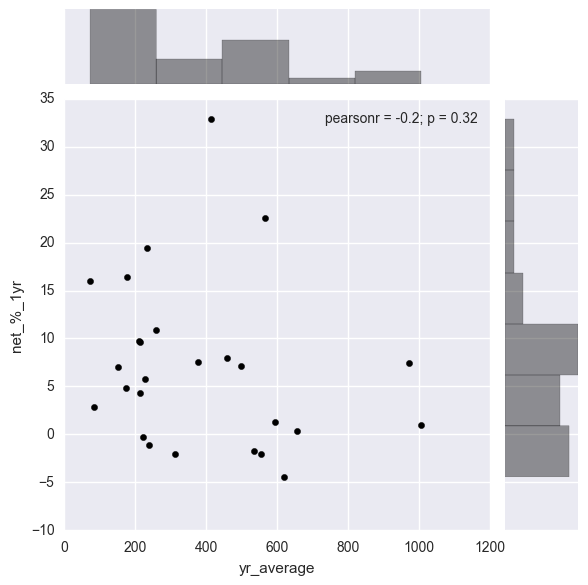

In [10]:
p = sns.jointplot(x='yr_average', y='net_%_1yr', data=city_df, color="k")
plt.show()
plt.clf()

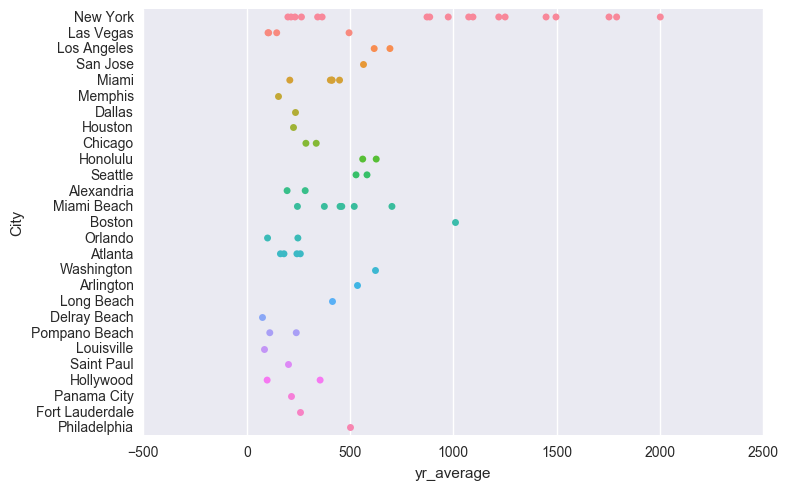

In [11]:
s = sns.stripplot(y='City', x='yr_average', data=df)
plt.show()
plt.clf()